In [1]:
import pandas as pd
from upsetplot import UpSet, plot
import matplotlib.pyplot as plt


In [2]:
consensus_df = pd.read_parquet('/home/jupyter-yusuf/Consensus/output/2_consensus.parquet')

In [3]:
# Count the occurrences of each unique list combination in the 'callers_in_agreement' column
list_combination_counts = consensus_df['callers_in_agreement'].apply(tuple).value_counts()

# Create a DataFrame from the counts
counts_df = list_combination_counts.reset_index()

# Rename the columns
counts_df.columns = ['list_combination', 'count']

# Convert the 'list_combination' column back to list format
counts_df['list_combination'] = counts_df['list_combination'].apply(list)

counts_df



,list_combination,count
0,"[aldy, cyrius, stellarpgx]",1047
1,[],346
2,"[aldy, cyrius]",230
3,"[cyrius, stellarpgx]",127
4,"[aldy, stellarpgx]",100


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

<Figure size 1080x720 with 0 Axes>

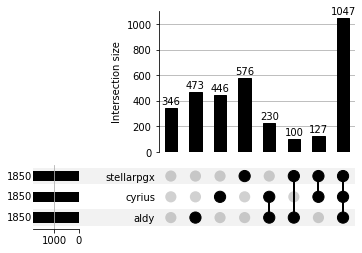

In [5]:
# Inputting manually, for testing purposes
plt.figure(figsize=(15, 10))

data = {
    (False, False, False): 346,
    (True, False, False): 473,
    (False, True, False): 446,
    (False, False, True): 576,
    (True, True, False): 230,
    (True, False, True): 100,
    (False, True, True): 127,
    (True, True, True): 1047,
}


# Filter out the zero-value groups
filtered_data = {k: v for k, v in data.items() if v != 0}

# Create a MultiIndex with the data
index = pd.MultiIndex.from_tuples(filtered_data.keys(), names=['aldy', 'cyrius', 'stellarpgx'])

# Create a Series from the index and data
series_data = pd.Series(list(filtered_data.values()), index=index)

# Create an UpSet plot
upset_plot = UpSet(series_data, show_counts=True,)
# fig = plt.figure(figsize=(15, 10))
# upset_plot.plot( fig = fig)
# # Set plot size
plt.rcParams["figure.figsize"] = [50, 20]

# Plot
upset_plot.plot()
# plt.show()

# series_data

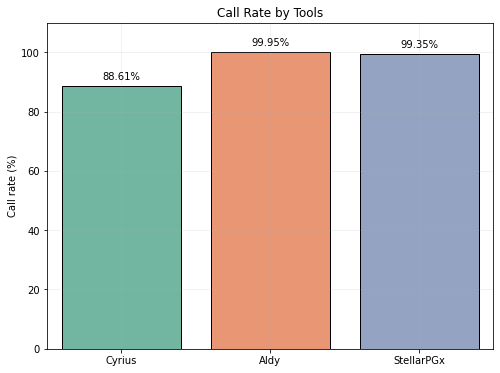

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with your data
data = {
    'Tools': ['Cyrius', 'Aldy', 'StellarPGx'],
    'Call rate (%)': [88.61, 99.95, 99.35]
}
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
barplot = sns.barplot(x='Tools', y='Call rate (%)', data=df, edgecolor="black", linewidth=1)

# Add values on the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.title("Call Rate by Tools")
plt.grid(alpha=0.2)
plt.xlabel(None)
plt.ylim(0, 110)
plt.show()
